# Grands principes de l'apprentissage

Ceci est un extrait du chapitre 1 du livre d'Aurélien Géron: "Hands-On Machine Learning with Scikit-Learn and TensorFlow". Disponible sur amazon (en anglais et en français) pour un tout petit prix. Et [ici](https://github.com/ageron/handson-ml) se trouve le projet github correspondant. 


## What and why


### What Is Machine Learning?


Machine Learning is the art of programming computers so they can learn from data. For example, your spam filter is a Machine Learning program that can learn to flag spam given examples of spam emails (e.g., flagged by users) and examples of regular (nonspam, also called “ham”) emails. 


### Why Use Machine Learning?

Consider how you would write a spam filter using traditional programming techniques: 

* 1/ First you would look at what spam typically looks like. You might notice that some words or phrases (such as “4U,” “credit card,” “free,” and “amazing”) tend to come up a lot in the subject. Perhaps you would also notice a few other patterns in the sender’s name, the email’s body, and so on.
* 2/ You would write a detection algorithm for each of the patterns that you noticed, and your program would flag emails as spam if a number of these patterns are detected.
* 2/ You would test your program, and repeat steps 1 and 2 until it is good enough. 

Since the problem is not trivial, your program will likely become a long list of complex rules — pretty hard to maintain.

|traditional approach |  machine learning approach|
|:--- | :--- |
| ![trad-approach](img/trad-approach.png)  | ![ml-approach](img/ml-approach.png) |

 
In contrast, a spam filter based on Machine Learning techniques automatically learns which words and phrases are good predictors of spam by detecting unusually frequent patterns of words in the spam examples compared to the ham examples. The program is much shorter, easier to maintain, and most likely more accurate. 

Another area where Machine Learning shines is for problems that either are too complex for traditional approaches or have no known algorithm. For example, consider speech recognition: say you want to start simple and write a program capable of distinguishing the words “one” and “two.” You might notice that the word “two” starts with a high-pitch sound (“T”), so you could hardcode an algorithm that measures high-pitch sound intensity and use that to distinguish ones and twos. Obviously this technique will not scale to thousands of words spoken by millions of very different people in noisy environments and in dozens of languages. The best solution (at least today) is to write an algorithm that learns by itself, given many example  recordings for each word.

Finally, Machine Learning can help humans learn (Figure 1-4): ML algorithms can be inspected to see what they have learned (although for some algorithms this can be tricky). For instance, once the spam filter has been trained on enough spam, it can easily be inspected to reveal the list of words and combinations of words that it believes are the best predictors of spam. Sometimes this will reveal unsuspected correlations or new trends, and thereby lead to a better understanding of the problem.
Applying ML techniques to dig into large amounts of data can help discover patterns that were not immediately apparent. This is called data mining. 



To summarize, Machine Learning is great for:

* Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better.
* Complex problems for which there is no good solution at all using a traditional approach: the best Machine Learning techniques can find a solution. 
* Fluctuating environments: a Machine Learning system can adapt to new data.
* Getting insights about complex problems and large amounts of data. 

### Types of Machine Learning Systems

There are so many different types of Machine Learning systems that it is useful to classify them in broad categories based on:

* Whether or not they are trained with human supervision (supervised, unsupervised, semisupervised, and Reinforcement Learning)
* Whether or not they can learn incrementally on the fly (online versus batch learning)
* Whether they work by simply comparing new data points to known data points, or instead detect patterns in the training data and build a predictive model, much like scientists do (instance-based versus model-based learning)

These criteria are not exclusive; you can combine them in any way you like. For example, a state-of-the-art spam filter may learn on the fly using a deep neural network model trained  using examples of spam and ham; this makes it an online, model-based, supervised learning system.

Let’s look at each of these criteria a bit more closely. 


## Supervised/Unsupervised Learning

Machine Learning systems can be classified according to the amount and type of supervision they get during training. There are four major categories: supervised learning, unsupervised learning, semisupervised learning, and Reinforcement Learning.

### Supervised learning

In supervised learning, the training data you feed to the algorithm includes the desired solutions, called labels. « A typical supervised learning task is **classification**. The spam filter is a good example of this: it is trained with many example emails along with their class (spam or ham), and it must learn  how to classify new emails.

Another typical task is to predict a target numeric value, such as the price of a car, given a set of features (mileage, age, brand, etc.) called predictors. This sort of task is called **regression** (Figure 1-6).1 To train the system, you need to give it many examples of cars, including both their predictors and their labels (i.e., their prices). 

|classification example |  regression example|
|:--- | :--- |
| ![classification](img/classification-intro.png)  | ![regression](img/regression-intro.png) |



***Vocabulary, attribute or feature:*** In Machine Learning an attribute is a data type (e.g., “Mileage”), while a feature has several meanings depending on the context, but generally means an attribute plus its value (e.g., “Mileage = 15,000”). Many people use the words attribute and feature interchangeably, though.



Note that some regression algorithms can be used for classification as well, and vice versa. For example, Logistic Regression is commonly used for classification because it output a value that corresponds to the probability of belonging to a given class (e.g., 20% chance of being spam).


Here are some of the most important supervised learning algorithms:

* k-Nearest Neighbors
* Linear Regression
* Logistic Regression
* Support Vector Machines (SVMs)
* Decision Trees and Random Forests
* Neural networks




###  Unsupervised learning

In unsupervised learning, as you might guess, the training data is unlabeled (Figure 1-7). The system tries to learn without a teacher. Here are some of the most important unsupervised learning algorithms):

* Clustering
    * k-Means
    * Hierarchical Cluster Analysis (HCA)
    * Expectation Maximization
* Visualization and dimensionality reduction
    * Principal Component Analysis (PCA)
    * Kernel PCA
    * Locally-Linear Embedding (LLE)
    * t-distributed Stochastic Neighbor Embedding (t-SNE)
* Association rule learning 
    * Apriori
    * Eclat
    
For example, say you have a lot of data about your blog’s visitors. You may want to run a clustering algorithm to try to detect groups of similar visitors (Figure 1-8). At no point do you tell the algorithm which group a visitor belongs to: it finds those connections without your help. For example, it might notice that 40% of your visitors are males who love comic books and generally read your blog in the evening, while 20% are young sci-fi lovers who visit during the weekends, and so on. If you use a hierarchical clustering algorithm, it may also subdivide each group into smaller groups. This may help you target your posts for each group.

![clustering](img/clustering-intro.png)


Visualization algorithms are also good examples of unsupervised learning algorithms: you feed them a lot of complex and unlabeled data, and they output a 2D or 3D representation of your data that can easily be plotted (Figure 1-9). These algorithms try to preserve as much structure as they can (e.g., trying to keep separate clusters in the input space from overlapping in the visualization), so you can understand how the data is organized and perhaps identify unsuspected patterns. 


A related task is dimensionality reduction, in which the goal is to simplify the data without losing too much information. One way to do this is to merge several correlated features into one. For example, a car’s mileage may be very correlated with its age, so the dimensionality reduction algorithm will merge them into one feature that represents the car’s wear and tear. This is called feature extraction. 


***TIP:*** It is often a good idea to try to reduce the dimension of your training data using a dimensionality reduction algorithm before you feed it to another Machine Learning algorithm (such as a supervised learning algorithm). It will run much faster, the data will take up less disk and memory space, and in some cases it may also perform better.
Yet another important unsupervised task is anomaly detection — for example, detecting unusual credit card transactions to prevent fraud, catching manufacturing defects, or automatically removing outliers from a dataset before feeding it to another learning algorithm. The system is trained with normal instances, and when it sees a new instance it can tell whether it looks like a normal one or whether it is likely an anomaly 

###  Semisupervised learning

Some algorithms can deal with partially labeled training data, usually a lot of unlabeled data and a little bit of labeled data. This is called semisupervised learning. Some photo-hosting services, such as Google Photos, are good examples of this. Once you upload all your family photos to the service, it automatically recognizes that the same person A shows up in photos 1, 5, and 11, while another person B shows up in photos 2, 5, and 7. This is the unsupervised part of the algorithm (clustering). Now all the system needs is for you to tell it who these people are. Just one label per person,4 and it is able to name everyone in every photo, which is useful for searching photos. 


### Reinforcement Learning

Reinforcement Learning is a very different beast. The learning system, called an agent in this context, can observe the environment, select and perform actions, and get rewards in return (or penalties in the form of negative rewards). It must then learn by itself what is the best strategy, called a policy, to get the most reward over time. A policy defines what action the agent should choose when it is in a given situation.  For example, many robots implement Reinforcement Learning algorithms to learn how to walk. DeepMind’s AlphaGo program is also a good example of Reinforcement Learning: it made the headlines in March 2016 when it beat the world champion Lee Sedol at the game of Go. It learned its winning policy by analyzing millions of games, and then playing many games against itself. Note that learning was turned off during the games against the champion; AlphaGo was just applying the policy it had learned.

## Batch and Online Learning

### Batch learning
In batch learning, the system is incapable of learning incrementally: it must be trained using all the available data. This will generally take a lot of time and computing resources, so it is typically done offline. First the system is trained, and then it is launched into production and runs without learning anymore; it just applies what it has learned. This is called offline learning.
If you want a batch learning system to know about new data (such as a new type of spam), you need to train a new version of the system from scratch on the full dataset (not just the new data, but also the old data), then stop the old system and replace it with the new one. 

### Online learning

In online learning, you train the system incrementally by feeding it data instances sequentially, either individually or by small groups called mini-batches. Each learning step is fast and cheap, so the system can learn about new data on the fly, as it arrives   A big challenge with online learning is that if bad data is fed to the system, the system’s performance will gradually decline. If  we are talking about a live system, your clients will notice. For example, bad data could come from a malfunctioning sensor on a robot, or from someone spamming a search engine to try to rank high in search results. To reduce this risk, you need to monitor your system closely and promptly switch learning off (and possibly revert to a previously working state) if you detect a drop in performance. You may also want to monitor the input data and react to abnormal data (e.g., using an anomaly detection algorithm).


## Instance-Based Versus Model-Based Learning

One more way to categorize Machine Learning systems is by how they generalize. Most Machine Learning tasks are about making predictions. This means that given a number of training examples, the system needs to be able to generalize to examples it has never seen before. Having a good performance measure on the training data is good, but insufficient; the true goal is to perform well on new instances.
There are two main approaches to generalization: instance-based learning and model-based learning.



|Instance-based learning |  Model-based learning|
|:--- | :--- |
| ![instance-based](img/instance-based.png)  | ![model-based](img/model-based.png) |



### Instance-based learning

Your spam filter could be programmed to flag  emails that are very similar to known spam emails. This requires a measure of similarity between two emails. A (very basic) similarity measure between two emails could be to count the number of words they have in common. The system would flag an email as spam if it has many words in common with a known spam email. This is called instance-based learning: the system learns the examples by heart, then generalizes to new cases using a similarity measure. 

### Model-based learning

Another way to generalize from a set of examples is to build a model of these examples, then use that model to make predictions. For example, suppose you want to know if money makes people happy: let's developp a model on the next section

## Does money make happiness

Now we want to know if money makes people happy, so we download the [Better Life Index](https://stats.oecd.org/index.aspx?DataSetCode=BLI) data from OECD (Organisation for Economic Co-operation and Development) as well as stats about [GDP per capita]( http://goo.gl/j1MSKe) from the IMF (International Monetary Found).

### Observe data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [15]:

def load_all_data():
    df_full=pd.read_csv("img/df_full.csv")
    df_full.set_index("Country",inplace=True)
    
    df_sample=pd.read_csv("img/df_sample.csv")
    df_sample.set_index("Country",inplace=True)
    
    df_missing=pd.read_csv("img/df_missing.csv")
    df_missing.set_index("Country",inplace=True)
    
    return df_full,df_sample,df_missing

_,df_sample,_=load_all_data()

"numpy extraction"
x_sample=df_sample["GDP per capita"]
X_sample_ext= np.stack([np.ones_like(x_sample),x_sample],axis=1) 
y_sample = df_sample["Life satisfaction"].values
print("x_sample.shape:",x_sample.shape)
print("X_sample_ext.shape",X_sample_ext.shape)
print("y_sample.shape",y_sample.shape)






"some very simple test data: points regularly spaced on a given interval"
xlim=60000
x_test=np.linspace(0, xlim, 1000)

x_sample.shape: (29,)
X_sample_ext.shape (29, 2)
y_sample.shape (29,)


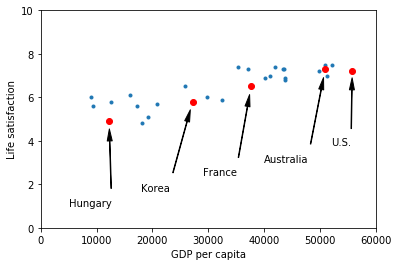

In [16]:
plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

#variante en utilisant le plot de pandas
#df_sample.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,4))


position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = df_sample.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text, arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

« There does seem to be a trend here! Although the data is noisy (i.e., partly random), it looks like life satisfaction goes up more or less linearly as the country’s GDP per capita increases. So you decide to model life satisfaction as a linear function of GDP per capita. This step is called model selection: you selected a linear model of life satisfaction with just one attribute, GDP per capita:
$$
\text{Life_statisfaction} = w_0 + w_1 \text{GDP_per_capita}+ \text{Bruit}
$$

### Fit model

w0:4.85 , w1:4.91E-05


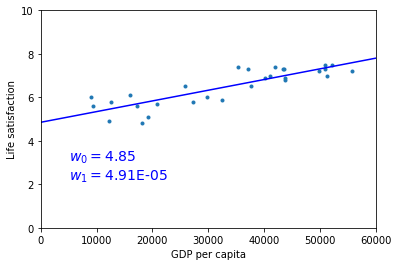

In [17]:
from sklearn import linear_model

model_lin_sample = linear_model.LinearRegression(fit_intercept=False)
model_lin_sample.fit(X_sample_ext, y_sample)
w0, w1=model_lin_sample.coef_[0],model_lin_sample.coef_[1]
print("w0:%.2f"%w0,", w1:%.2E"%w1)

plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

plt.plot(x_test, w0 + w1*x_test, "b")

plt.text(5000, 3.1, r"$w_0=$"+"%.2f"%w0, fontsize=14, color="b")
plt.text(5000, 2.2, r"$w_1=$"+"%.2E"%w1, fontsize=14, color="b");

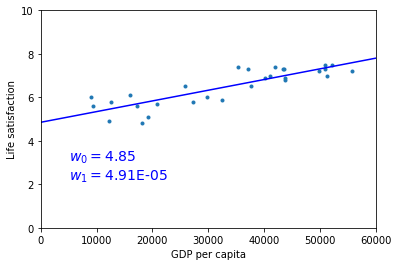

In [18]:
plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

plt.plot(x_test, w0 + w1*x_test, "b")

plt.text(5000, 3.1, r"$w_0=$"+"%.2f"%w0, fontsize=14, color="b")
plt.text(5000, 2.2, r"$w_1=$"+"%.2E"%w1, fontsize=14, color="b");

Now the model fits the training data as closely as possible (for a linear model). 

### Prediction

You are finally ready to run the model to make predictions. For example, say you want to know how happy Cypriots are, and the OECD data does not have the answer. Fortunately, you can  use your model to make a good prediction: you look up Cyprus’s GDP per capita, find \$22,587, and then apply your model and find that life satisfaction.


In [19]:
cyprus_gdp = 22587
print("cyprus gdp per capita:",cyprus_gdp)
cyprus_life_hat = model_lin_sample.predict([[1,cyprus_gdp]])
print("prediction of cyprus life satisfaction:",cyprus_life_hat)

cyprus gdp per capita: 22587
prediction of cyprus life satisfaction: [5.96242338]


***A vous:*** Retrouvez $(2\heartsuit)$ la valeur prédite sans utiliser la méthode `.predict()` mais en utilisant direcement `w0` et `w1`.

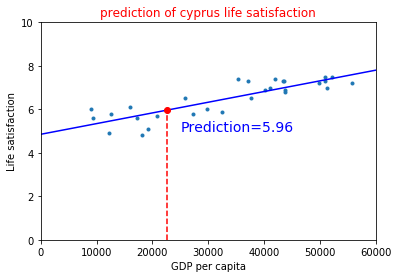

In [20]:
plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

a=np.linspace(0, xlim, 1000)
plt.plot(a, w0 + w1*a, "b")

plt.title("prediction of cyprus life satisfaction",color="r")
plt.plot([cyprus_gdp, cyprus_gdp], [0, cyprus_life_hat], "r--")
plt.text(25000, 5.0, "Prediction=%.2f"%cyprus_life_hat, fontsize=14, color="b")
plt.plot(cyprus_gdp, cyprus_life_hat, "ro");

***A vous:***  Calculez $(2\heartsuit)$ la prédiction donnerait l'algo des 3 plus proches voisins (instance-based). Il faut simplement répérer les 4 pays les plus proches de Chipre et moyenner leur `life_satisfaction`. Aide: utilisez `sort_values()`. Faites $(+2\diamondsuit)$ en sorte que votre procédure soit automatique (=qu'elle utilise pas la lecture humaine d'un tableau).

If all went well, our model will make good predictions. If not, we may need to use more attributes (employment rate, health, air pollution, etc.), get more or better quality training data, or perhaps select a more powerful model (e.g., a Polynomial « Regression model).

In summary:

* We studied the data.
* We selected a model.
* We trained it on the training data (i.e., the learning algorithm searched for the model parameter values that minimize a cost function).
* Finally, we applied the model to make predictions on new cases (this is called inference), hoping that this model will generalize well.

This is what a typical Machine Learning project looks like. 

##  Main Challenges of Machine Learning

###  Insufficient Quantity of Training Data

For a toddler to learn what an apple is, all it takes is for you to point to an apple and say “apple” (possibly repeating this procedure a few times). Now the child is able to recognize apples in all sorts of colors and shapes. Genius.
Machine Learning is not quite there yet; it takes a lot of data for most Machine Learning algorithms to work properly. Even for very simple problems you typically need thousands of examples, and for complex problems such as image or speech recognition you may need millions of examples (unless you can reuse parts of an existing model). 


###  The unreasonable effetiveness of data

In a famous paper published in 2001, Microsoft researchers Michele Banko and Eric Brill showed that very different Machine Learning algorithms, including fairly simple ones, performed almost identically well on a complex problem of natural language disambiguation8 once they were given enough data. As the authors put it: “these results suggest that we may want to reconsider the trade-off between spending time and money on algorithm development versus spending it on corpus development.  The idea that data matters more than algorithms for complex problems was further popularized by Peter Norvig et al. in a paper titled “The Unreasonable Effectiveness of Data” published in 2009.10 It should be  noted, however, that small- and medium-sized datasets are still very common, and it is not always easy or cheap to get extra training data, so don’t abandon algorithms just yet. 


![unreasonable](img/unreasonable.png)


### Nonrepresentative Training Data

In order to generalize well, it is crucial that your training data be representative of the new cases you want to generalize to. This is true whether you use instance-based learning or model-based learning.
For example, the set of countries we used earlier for training the linear model was not perfectly representative; a few countries were missing. 

In [21]:
df_full,df_sample,df_missing=load_all_data()


"numpy extraction"
x_sample = df_sample["GDP per capita"].values
X_sample_ext= np.stack([np.ones_like(x_sample),x_sample],axis=1) 
y_sample = df_sample["Life satisfaction"].values

"numpy extraction"
x_full = df_full["GDP per capita"].values
X_full_ext = np.stack([np.ones_like(x_full),x_full],axis=1) 
y_full = df_full["Life satisfaction"].values

"some very simple test data: points regularly spaced on a given interval"
xlim=110000
x_test=np.linspace(0, xlim, 1000)

df_missing

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [22]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

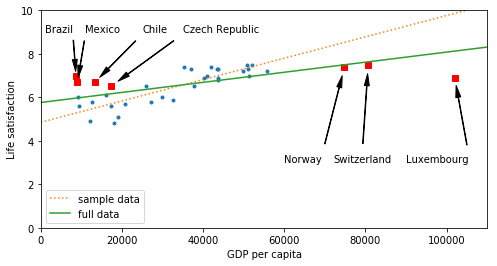

In [23]:
plt.figure(figsize=(8,4))
plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = df_missing.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")
    

def fit_and_plot_lin_model(X,y):    
    model = linear_model.LinearRegression(fit_intercept=False)
    model.fit(X, y)
    w0, w1=model.coef_[0],model.coef_[1]
    return w0,w1
    
    
w0_sample,w1_sample=fit_and_plot_lin_model(X_sample_ext,y_sample)
w0_full,w1_full=fit_and_plot_lin_model(X_full_ext,y_full)

plt.plot(x_test, w0_sample + w1_sample*x_test,":",label="sample data")
plt.plot(x_test, w0_full + w1_full*x_test,label="full data")
plt.legend(loc=3);



As you can see, not only does adding a few missing countries significantly alter the model, but it makes it clear that such a simple linear model is probably never going to work well. It seems that very rich countries are not happier than moderately rich countries (in fact they seem unhappier), and conversely some poor countries seem happier than many rich countries.  By using a nonrepresentative training set, we trained a model that is unlikely to make accurate predictions, especially for very poor and very rich countries.

It is crucial to use a training set that is representative of the cases you want to generalize to. This is often harder than it sounds: if the sample is too small, you will have sampling noise (i.e., nonrepresentative data as a result of chance), but even very large samples can be nonrepresentative if the sampling method is flawed. This is called sampling bias.



### A famous example of sampling bias

Perhaps the most famous example of sampling bias happened during the US presidential election in 1936, which pitted Landon against Roosevelt: the Literary Digest conducted a very large poll, sending mail to about 10 million people. It got 2.4 million answers, and predicted with high confidence that Landon would get 57% of the votes. Instead, Roosevelt won  with 62% of the votes. The flaw was in the Literary Digest’s sampling method:

* First, to obtain the addresses to send the polls to, the Literary Digest used telephone directories, lists of magazine subscribers, club membership lists, and the like. All of these lists tend to favor wealthier people, who are more likely to vote Republican (hence Landon).
* Second, less than 25% of the people who received the poll answered. Again, this introduces a sampling bias, by ruling out people who don’t care much about politics, people who don’t like the Literary Digest, and other key groups. This is a special type of sampling bias called nonresponse bias. 

###  Poor-Quality Data

Obviously, if your training data is full of errors, outliers, and noise (e.g., due to poor-quality measurements), it will make it harder for the system to detect the underlying patterns, so your system is less likely to perform well. It is often well worth the effort to spend time cleaning up your training data. The truth is, most data scientists spend a significant part of their time doing just that. 


###  Irrelevant Features

As the saying goes: garbage in, garbage out. Your system will only be capable of learning if the training data contains enough relevant features and not too many irrelevant ones. A critical part of the success of a Machine Learning project is coming up with a good set of features to train on. This process, called feature engineering, involves:

* Feature selection: selecting the most useful features to train on among existing features.
* Feature extraction: combining existing features to produce a more useful one (as we saw earlier, dimensionality reduction algorithms can help).
* Creating new features by gathering new data. 

###  Overfitting the Training Data

Say you are visiting a foreign country and the taxi driver rips you off. You might be tempted to say that all taxi drivers in that country are thieves. Overgeneralizing is something that we humans do all too often, and unfortunately machines can fall into the same trap if we are not careful. In Machine Learning this is called overfitting: it means that the model performs well on the training data, but it does not generalize well.

Here is  an example of a high-degree polynomial life satisfaction model that strongly overfits the training data. Even though it performs much better on the training data than the simple linear model, would you really trust its predictions?

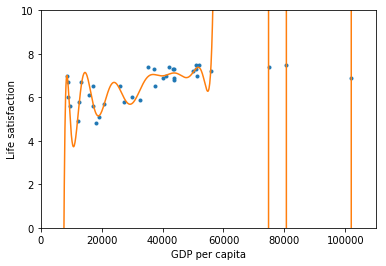

In [29]:
"we rename our full-data to make them shorter"
x=x_full
X=x[:,np.newaxis]
y=y_full


plt.plot(x,y,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=20, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler),('lin',lin_reg2)])
pipeline_reg.fit(X, y) 
y_test_hat = pipeline_reg.predict(x_test[:,np.newaxis])

plt.plot(x_test,y_test_hat);

Complex models such as deep neural networks can detect subtle patterns in the data, but if the training set is noisy, or if it is too small (which introduces sampling noise), then the model is likely to detect patterns in the noise itself. Obviously these patterns will not generalize to new instances. For example, say you feed your life satisfaction model many more attributes, including uninformative ones such as the country’s name. In that case, a complex model may detect patterns like the fact that all countries in the training data with a w in their name have a life satisfaction greater than 7: New Zealand (7.3), Norway (7.4), Sweden (7.2), and Switzerland (7.5). How confident are you that the W-satisfaction rule generalizes to Rwanda or Zimbabwe? Obviously this pattern occurred in the training data by pure chance, but the model has no way to tell whether a pattern is real or simply the result of noise in the data.

## Constraining a model

Overfitting happens when the model is too complex relative to the amount and noisiness of the training data. The possible solutions are:

* To simplify the model by selecting one with fewer parameters (e.g., a linear model rather than a high-degree polynomial model), by reducing the number of attributes in the training data or by constraining the model
* To gather more training data
* To reduce the noise in the training data (e.g., fix data errors and remove outliers).


Constraining a model to make it simpler and reduce the risk of overfitting is called regularization. For example, the linear model we defined earlier has two parameters, $w_0$ and $w_1$. This gives the  learning algorithm two degrees of freedom to adapt the model to the training data: it can tweak both the height $w_0$ and the slope $w_1$ of the line. If we forced $w_1 = 0$, the algorithm would have only one degree of freedom and would have a much harder time fitting the data properly: all it could do is move the line up or down to get as close as possible to the training instances, so it would end up around the mean. A very simple model indeed!  





If we allow the algorithm to modify $w_1$ but we force it to keep it small, then the learning algorithm will effectively have somewhere in between one and two degrees of freedom. It will produce a simpler model than with two degrees of freedom, but more complex than with just one. You want to find the right balance between fitting the data perfectly and keeping the model simple enough to ensure that it will generalize well.

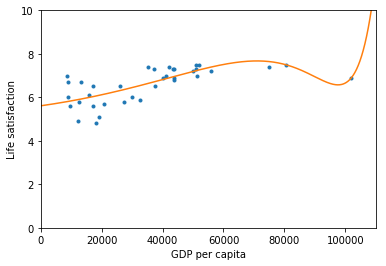

In [31]:
plt.plot(x,y,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

poly = preprocessing.PolynomialFeatures(degree=20, include_bias=False)
scaler = preprocessing.StandardScaler()
ridge = linear_model.Ridge(alpha=0.5)
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler),('lin',ridge)])
pipeline_reg.fit(X, y) 
y_test_hat = pipeline_reg.predict(x_test[:,np.newaxis])

plt.plot(x_test,y_test_hat);

The amount of regularization to apply during learning can be controlled by a hyperparameter. A hyperparameter is a parameter of a learning algorithm (not of the model). As such, it is not affected by the learning algorithm itself; it must be set prior to training and remains constant during training. If you set the regularization hyperparameter to a very large value, you will get an almost flat model (a slope close to zero); the learning algorithm will almost certainly not overfit the training data, but it will be less likely to find a good solution. Tuning hyperparameters is an important part of building a Machine Learning system  »

Extrait de: Aurélien Géron. « Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. » iBooks. 

###  Underfitting the Training Data

As you might guess, underfitting is the opposite of overfitting: it occurs when your model is too simple to learn the underlying structure of the data. For example, a linear model of life satisfaction is prone to underfit; reality is just more complex than the model, so its predictions are bound to be inaccurate, even on the training examples.
The main options to fix this problem are:
Selecting a more powerful model, with more parameters
Feeding better features to the learning algorithm (feature engineering)
Reducing the constraints on the model (e.g., reducing the  regularization hyperparameter) 

##  Stepping Back

By now you already know a lot about Machine Learning. However, we went through so many concepts that you may be feeling a little lost, so let’s step back and look at the big picture:

* Machine Learning is about making machines get better at some task by learning from data, instead of having to explicitly code rules.
* There are many different types of ML systems: supervised or not, batch or online, instance-based or model-based, and so on.
* In a ML project you gather data in a training set, and you feed the training set to a learning algorithm. If the algorithm  is model-based it tunes some parameters to fit the model to the training set (i.e., to make good predictions on the training set itself), and then hopefully it will be able to make good predictions on new cases as well. If the algorithm is instance-based, it just learns the examples by heart and uses a similarity measure to generalize to new instances.
* The system will not perform well if your training set is too small, or if the data is not representative, noisy, or polluted with irrelevant features (garbage in, garbage out). Lastly, your model needs to be neither too simple (in which case it will underfit) nor too complex (in which case it will overfit).

There’s just one last important topic to cover: once you have trained a model, you don’t want to just “hope” it generalizes to  new cases. You want to evaluate it, and fine-tune it if necessary. Let’s see how. 

##  Testing and Validating

The only way to know how well a model will generalize to new cases is to actually try it out on new cases. One way to do that is to put your model in production and monitor how well it performs. This works well, but if your model is horribly bad, your users will complain — not the best idea.
A better option is to split your data into two sets: the training set and the test set. As these names imply, you train your model using the training set, and you test it using the test set. The error rate on new cases is called the generalization error (or out-of-sample error), and by evaluating your model on the test set, you get an estimation of this error. This value tells you how well your model will perform on instances it has never seen before.
If the training error is low (i.e., your model makes few mistakes on the training set) but the generalization error is high, it   means that your model is overfitting the training data.


***TIP:*** It is common to use 80% of the data for training and hold out 20% for testing.

So evaluating a model is simple enough: just use a test set. Now suppose you are hesitating between two models (say a linear model and a polynomial model): how can you decide? One option is to train both and compare how well they generalize using the test set.
Now suppose that the linear model generalizes better, but you want to apply some regularization to avoid overfitting. The question is: how do you choose the value of the regularization hyperparameter? One option is to train 100 different models using 100 different values for this hyperparameter. Suppose you  find the best hyperparameter value that produces a model with the lowest generalization error, say just 5% error.

So you launch this model into production, but unfortunately it does not perform as well as expected and produces 15% errors. What just happened? The problem is that you measured the generalization error multiple times on the test set, and you adapted the model and hyperparameters to produce the best model for that set. This means that the model is unlikely to perform as well on new data.
A common solution to this problem is to have a second holdout set called the validation set. You train multiple models with various hyperparameters using the training set, you select the model and hyperparameters that perform best on the validation set, and when you’re happy with your model you run a single final test against the test set to get an estimate of the generalization error.

To avoid “wasting” too much training data in validation sets, a common technique is to use cross-validation: the training set is split into complementary subsets, and each model is trained against a different combination of these subsets and validated against the remaining parts.  Once the model type and hyperparameters have been selected, a final model is trained using these hyperparameters on the full training set, and the generalized error is measured on the test set.


***NO FREE LUNCH THEOREM:***  A model is a simplified version of the observations. The simplifications are meant to discard the superfluous details that are unlikely to generalize to new instances. However, to decide what data to discard and what data to keep, you must make assumptions. For example, a linear model makes the assumption that the data is fundamentally linear and that the distance between the instances and the straight line is just noise, which can safely   be ignored. In a famous 1996 paper David Wolpert demonstrated that if you make absolutely no assumption about the data, then there is no reason to prefer one model over any other. This is called the No Free Lunch (NFL) theorem. For some datasets the best model is a linear model, while for other datasets it is a neural network. There is no model that is a priori guaranteed to work better (hence the name of the theorem). The only way to know for sure which model is best is to evaluate them all. Since this is not possible, in practice you make some reasonable assumptions about the data and you evaluate only a few reasonable models. For example, for simple tasks you may evaluate linear models with various levels of regularization, and for a complex problem you may evaluate various neural networks.